In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import LSTM
from tensorflow.keras import regularizers
from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from numpy import concatenate
import numpy as np
import tensorflow as tf
import random as rn
import numpy as np

C:\Users\Reza\anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  app.launch_new_instance()


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
excel_file = r'Data.xlsx'
#WBHP = pd.read_excel(excel_file, 0)
WOPR = pd.read_excel(excel_file, 1)
#WGPR = pd.read_excel(excel_file, 2)
#WGOR = pd.read_excel(excel_file, 3)
#WWCT = pd.read_excel(excel_file, 4)
#WWPR = pd.read_excel(excel_file, 5)
#WWIR = pd.read_excel(excel_file, 6)
#WGIR = pd.read_excel(excel_file, 7)
NAMES = pd.read_excel(excel_file, 8)
total_field = pd.read_excel(excel_file, 10)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

prods = WOPR[WOPR.columns[1:]]
time = WOPR['TIME (days)']

In [5]:
prods

,B-1AH,B-1BH,B-1H,B-2H,B-3H,B-4AH,B-4BH,B-4DH,B-4H,C-1H,...,E-3BH,E-3CH,E-3H,E-4AH,E-4H,F-1H,F-2H,F-3H,F-4H,K-3H
0,0,0.0000,0.0,0.0000,0.000000,0,0.0,0.000000,0.0,0,...,0,0.00000,0.0,0.0,0,0,0,0,0,0.000000
1,0,0.0000,0.0,0.0000,0.000000,0,0.0,0.000000,0.0,0,...,0,0.00000,0.0,0.0,0,0,0,0,0,0.000000
2,0,0.0000,0.0,0.0000,0.000000,0,0.0,0.000000,0.0,0,...,0,0.00000,0.0,0.0,0,0,0,0,0,0.000000
3,0,0.0000,0.0,0.0000,0.000000,0,0.0,0.000000,0.0,0,...,0,0.00000,0.0,0.0,0,0,0,0,0,0.000000
4,0,0.0000,0.0,0.0000,0.000000,0,0.0,0.000000,0.0,0,...,0,0.00000,0.0,0.0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,2803.6279,0.0,1007.4354,11.014889,0,0.0,48.230282,0.0,0,...,0,199.04060,0.0,0.0,0,0,0,0,0,20.448385
1020,0,2814.0354,0.0,1007.2368,10.822358,0,0.0,48.067974,0.0,0,...,0,196.86664,0.0,0.0,0,0,0,0,0,20.540836
1021,0,2814.1409,0.0,1006.7402,10.596679,0,0.0,47.830791,0.0,0,...,0,195.23378,0.0,0.0,0,0,0,0,0,20.693357
1022,0,2809.8223,0.0,1006.4165,10.418043,0,0.0,47.634338,0.0,0,...,0,194.53340,0.0,0.0,0,0,0,0,0,20.825230


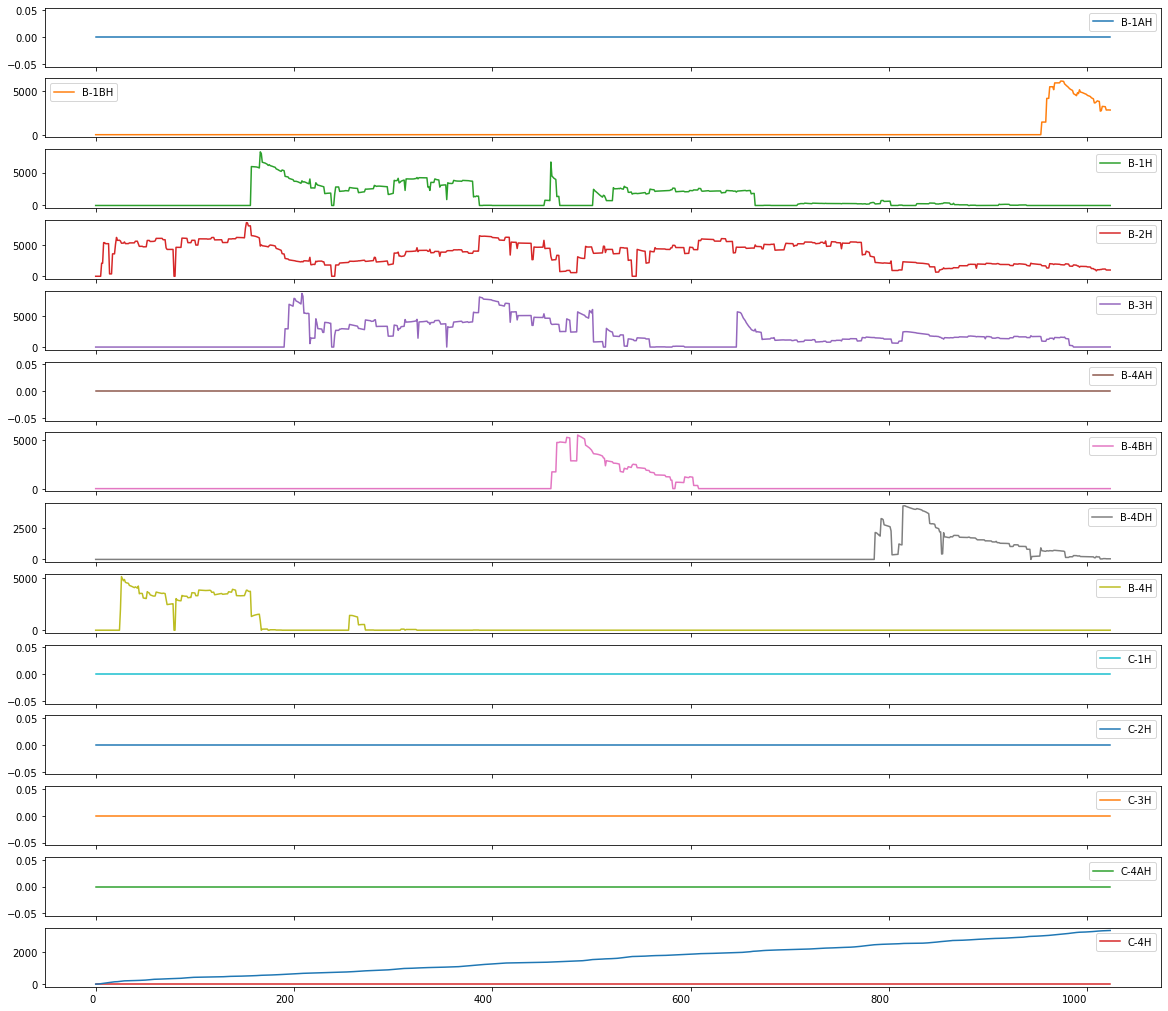

In [6]:
plot_cols = WOPR.columns[1:15]
plot_features = WOPR[plot_cols]
plot_featues = WOPR['TIME (days)']
_ = plot_features.plot(subplots=True,figsize=(20,20))

plot_features = WOPR[plot_cols][:]
plot_features = WOPR['TIME (days)']
_ = plot_features.plot(subplots = True)

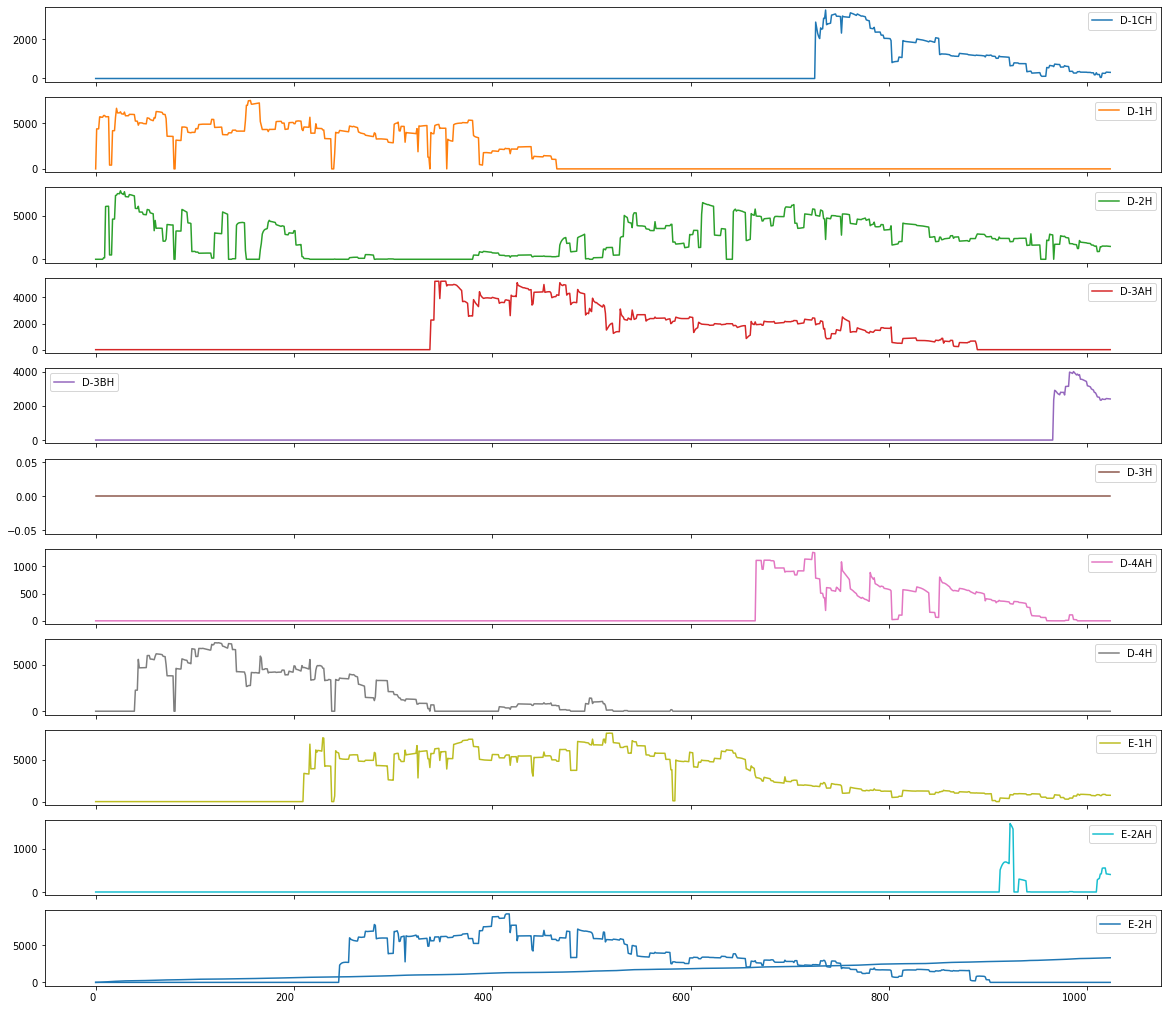

In [7]:
plot_cols = WOPR.columns[15:26]
plot_features = WOPR[plot_cols]
plot_featues = WOPR['TIME (days)']
_ = plot_features.plot(subplots=True,figsize=(20,20))

plot_features = WOPR[plot_cols][:]
plot_features = WOPR['TIME (days)']
_ = plot_features.plot(subplots = True)

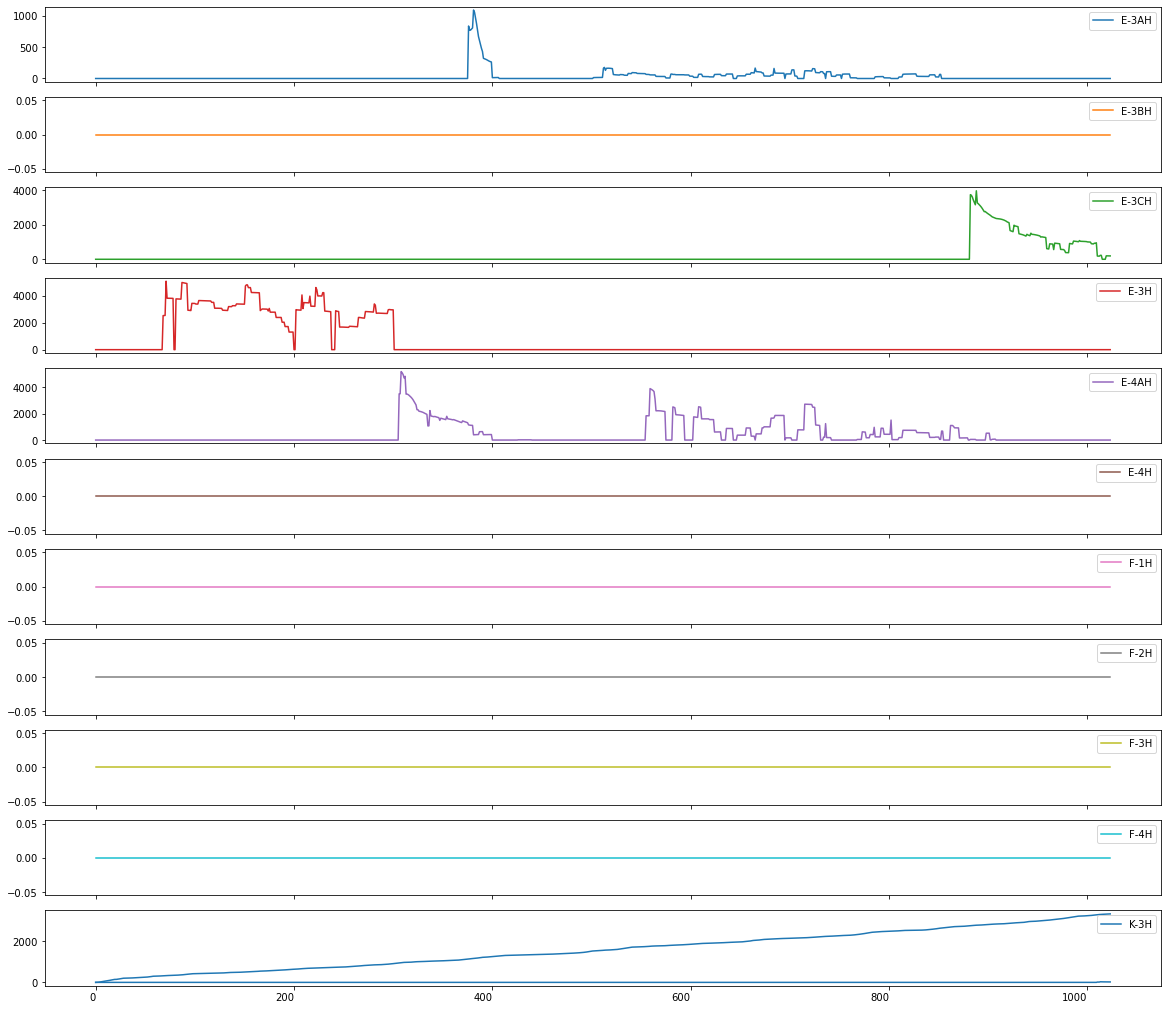

In [8]:
plot_cols = WOPR.columns[26:]
plot_features = WOPR[plot_cols]
plot_featues = WOPR['TIME (days)']
_ = plot_features.plot(subplots=True,figsize=(20,20))

plot_features = WOPR[plot_cols][:]
plot_features = WOPR['TIME (days)']
_ = plot_features.plot(subplots = True)

In [9]:
total_field.head()

,Time,WWIR,WWPR,WWCT,WGOR,WGPR,WBHP,WGIR,WOPR
0,0.0,0.0,0.000000,0.000000,0.00000,0.00,809.17371,0.00,0.0000
1,1.0,0.0,4.254708,0.000971,108.75953,476237.47,765.11941,0.00,4378.8115
2,4.0,0.0,4.225478,0.000964,108.71009,476107.63,762.55516,0.00,4379.6084
3,8.0,0.0,4.350357,0.000992,108.65411,475948.09,760.00822,0.00,4380.3970
4,16.5,0.0,5.632184,0.000989,108.56667,617919.31,744.72472,392180.97,5691.6118


In [10]:
total_production=total_field['WOPR']
time = np.array(WOPR['TIME (days)'])
time

array([0.0000000e+00, 1.0000000e+00, 4.0000000e+00, ..., 3.3063398e+03,
       3.3091699e+03, 3.3120000e+03])

In [11]:
df=np.concatenate((time,total_production), axis=None).reshape(1024,2)
#df

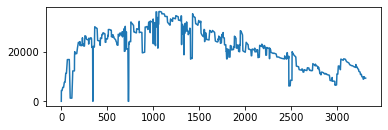

In [12]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.subplot(211)
plt.plot(time, total_production)

plt.show()

In [13]:
excel_file = 'Data.xlsx'
total_field = pd.read_excel(excel_file, 10)
Time = total_field['Time']
df= pd.read_excel('Total_Field_denoised.xlsx')
#df.index = Time
df['Time'] =Time
df[['Time','WOPR']]

,Time,WOPR
0,0.0000,2989.591340
1,1.0000,3770.043554
2,4.0000,4431.591128
3,8.0000,5106.132221
4,16.5000,5928.159454
...,...,...
1019,3300.1875,9663.453897
1020,3302.9219,9596.027476
1021,3306.3398,9545.472706
1022,3309.1699,9508.189921


In [14]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]





# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataset = np.insert(dataset,[0]*look_back,0)    
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    dataY= np.array(dataY)        
    dataY = np.reshape(dataY,(dataY.shape[0],1))
    dataset = np.concatenate((dataX,dataY),axis=1)  
    return dataset


# compute RMSPE
def RMSPE(x,y):
    result=0
    for i in range(len(x)):
        result += ((x[i]-y[i])/x[i])**2
    result /= len(x)
    result = sqrt(result)
    result *= 100
    return result

# compute MAPE
def MAPE(x,y):
    result=0
    for i in range(len(x)):
        result += abs((x[i]-y[i])/x[i])
    result /= len(x)
    result *= 100
    return result


In [15]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], X.shape[1],1 )
    model = Sequential()
    model.add(GRU(neurons[0], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True,return_sequences=True))
    model.add(Dropout(0.3))
    model.add(GRU(neurons[1], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True,return_sequences=True))
    model.add(Dropout(0.3))
    #model.add(GRU(neurons[2], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    #model.add(Dropout(0.3))
    model.add(Dense(8,'sigmoid'))
    # model.add(LSTM(neurons[3], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    # model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        print('epoch:',i+1)
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, len(X), 1)
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [16]:
def fit_DNN(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], X.shape[1],1 )
    model = Sequential()
    model.add(Dense(neurons[0], 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(neurons[1], 'relu', ))
    model.add(Dropout(0.3))
    model.add(Dense(neurons[2],'sigmoid' ))
    model.add(Dropout(0.3))
    model.add(Dense(neurons[3],'sigmoid' ))
    model.add(Dropout(0.5))
    model.add(Dense(neurons[4],'sigmoid'))
    
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        print('epoch:',i+1)
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    
# make a one-step forecast
def forecast_DNN(model, batch_size, X):
    X = X.reshape(1, len(X), 1)
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [20]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], X.shape[1],1 )
    model = Sequential()
    model.add(GRU(neurons[0], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True,return_sequences=True))
    model.add(Dropout(0.3))
    model.add(GRU(neurons[1], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True,return_sequences=True))
    model.add(Dropout(0.5))
    #model.add(GRU(neurons[2], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    #model.add(Dropout(0.3))
    #model.add(Dense(neurons[3],'sigmoid'))
    # model.add(LSTM(neurons[3], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    # model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        print('epoch:',i+1)
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    


# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, len(X), 1)
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataset = np.insert(dataset,[0]*look_back,0)    
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    dataY= np.array(dataY)        
    dataY = np.reshape(dataY,(dataY.shape[0],1))
    dataset = np.concatenate((dataX,dataY),axis=1)  
    return dataset


# compute RMSPE
def RMSPE(x,y):
    result=0
    for i in range(len(x)):
        result += ((x[i]-y[i])/x[i])**2
    result /= len(x)
    result = sqrt(result)
    #result *= 100
    return result

# compute MAPE
def MAPE(x,y):
    result=0
    for i in range(len(x)):
        result += abs((x[i]-y[i])/x[i])
    result /= len(x)
    result *= 100
    return result


def experiment(series,look_back,neurons,n_epoch):

    raw_values = series.values
    # transform data to be stationary
    diff = difference(raw_values, 1)
    

    # create dataset x,y
    dataset = diff.values
    dataset = create_dataset(dataset,look_back)


    # split into train and test sets
    train_size = int(dataset.shape[0] * 0.8)
    test_size = dataset.shape[0] - train_size
    train, test = dataset[0:train_size], dataset[train_size:]


    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)



    # fit the model
    lstm_model = fit_lstm(train_scaled, 1, n_epoch, neurons)
    # forecast the entire training dataset to build up state for forecasting
    print('Forecasting Training Data')   
    predictions_train = list()
    for i in range(len(train_scaled)):
        # make one-step forecast
        X, y = train_scaled[i, 0:-1], train_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(raw_values)-i)
        # store forecast
        predictions_train.append(yhat)
         



    # forecast the test data
    print('Forecasting Testing Data')
    predictions_test = list()
    for i in range(len(test_scaled)):
        # make one-step forecast
        X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # store forecast
        predictions_test.append(yhat)
        expected = raw_values[len(train) + i + 1]
        print('Number%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
    
    # report performance using RMSE
    #rmse_test = sqrt(mean_squared_error(raw_values[-len(test_scaled):], predictions_test))
    #print('Test RMSE: %.4f' % rmse_test)
    #report performance using RMSPE
    rmspe_test = RMSPE(raw_values[-len(test_scaled):],predictions_test)
    print('Test RMSE: %.4f' % rmspe_test)
    #MAE_test = mean_absolute_error(raw_values[-len(test_scaled):], predictions_test)
    #print('Test MAE: %.5f' % MAE_test)
    MAPE_test = MAPE(raw_values[-len(test_scaled):], predictions_test)
    print('Test MAPE: %.5f' % MAPE_test)
    
    predictions = np.concatenate((predictions_train,predictions_test),axis=0)

    # line plot of observed vs predicted
    fig, ax = plt.subplots(1)
    ax.plot(raw_values, label='original', color='blue')
    ax.plot(predictions, label='predictions', color='red')
    ax.axvline(x=len(train_scaled)+1,color='k', linestyle='--')
    ax.legend(loc='upper right')
    ax.set_xlabel('Time',fontsize = 16)
    ax.set_ylabel('oil production ',fontsize = 16)
    plt.show()

    


epoch: 1
818/818 [==============================] - 3s 3ms/step - loss: 0.0232
epoch: 2
818/818 [==============================] - 2s 3ms/step - loss: 0.0203
epoch: 3
818/818 [==============================] - 2s 3ms/step - loss: 0.0179
epoch: 4
818/818 [==============================] - 3s 3ms/step - loss: 0.0171
epoch: 5
818/818 [==============================] - 2s 3ms/step - loss: 0.0186
epoch: 6
818/818 [==============================] - 2s 2ms/step - loss: 0.0161
epoch: 7
818/818 [==============================] - 2s 3ms/step - loss: 0.0165
epoch: 8
818/818 [==============================] - 3s 3ms/step - loss: 0.0161
epoch: 9
818/818 [==============================] - 3s 3ms/step - loss: 0.0156
epoch: 10
818/818 [==============================] - 3s 3ms/step - loss: 0.0159
epoch: 11
818/818 [==============================] - 2s 3ms/step - loss: 0.0158
Forecasting Training Data
Forecasting Testing Data
Number1, Predicted=19750.209984, Expected=19458.580558
Number2, Predicted=1973

Number135, Predicted=7608.661100, Expected=7490.091021
Number136, Predicted=7324.655267, Expected=7422.939254
Number137, Predicted=7204.343179, Expected=7485.922646
Number138, Predicted=7386.484111, Expected=7700.634875
Number139, Predicted=7697.156468, Expected=8118.176772
Number140, Predicted=8226.649633, Expected=8827.594907
Number141, Predicted=9089.152468, Expected=9975.264970
Number142, Predicted=10465.794899, Expected=10885.747793
Number143, Predicted=11739.017115, Expected=11752.910594
Number144, Predicted=12438.362643, Expected=12757.095974
Number145, Predicted=13398.291460, Expected=13429.764592
Number146, Predicted=14174.959892, Expected=13923.495730
Number147, Predicted=14419.542674, Expected=14346.232324
Number148, Predicted=14690.641841, Expected=14789.865093
Number149, Predicted=15069.483837, Expected=15612.810419
Number150, Predicted=15902.087294, Expected=16115.053807
Number151, Predicted=16695.734869, Expected=16412.991200
Number152, Predicted=16766.987353, Expected=1

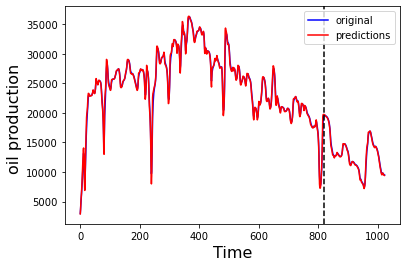

In [21]:
def run():

    #load dataset
    
    #df=np.concatenate((time, total_production), axis=0)
    new_series = df
    #new_series= new_series.values.reshape(1024,2)
    new_series = pd.DataFrame(new_series ,columns=['Time','WOPR'])
    new_series.set_index("Time", inplace=True)
    series= new_series
    look_back= 2
    neurons=[ 15 ,20 , 15,15 ]
    n_epoch=11
    experiment(series,look_back,neurons,n_epoch)

run()

epoch: 1
818/818 [==============================] - 1s 1ms/step - loss: 0.0501
epoch: 2
818/818 [==============================] - 1s 1ms/step - loss: 0.0334
epoch: 3
818/818 [==============================] - 1s 1ms/step - loss: 0.0272
epoch: 4
818/818 [==============================] - 1s 992us/step - loss: 0.0244
epoch: 5
818/818 [==============================] - 1s 1ms/step - loss: 0.0236
epoch: 6
818/818 [==============================] - 1s 1ms/step - loss: 0.0242
epoch: 7
818/818 [==============================] - 1s 1ms/step - loss: 0.0226
epoch: 8
818/818 [==============================] - 1s 992us/step - loss: 0.0229
epoch: 9
818/818 [==============================] - 1s 1ms/step - loss: 0.0224
epoch: 10
818/818 [==============================] - 1s 1ms/step - loss: 0.0228
epoch: 11
818/818 [==============================] - 1s 1ms/step - loss: 0.0227
epoch: 12
818/818 [==============================] - 1s 1ms/step - loss: 0.0234
epoch: 13
818/818 [==========================

Number119, Predicted=10410.619536, Expected=10196.746342
Number120, Predicted=10142.044357, Expected=9865.107158
Number121, Predicted=9749.307384, Expected=9381.761577
Number122, Predicted=9178.126837, Expected=9073.123883
Number123, Predicted=8777.975286, Expected=8887.770484
Number124, Predicted=8702.609849, Expected=8796.418378
Number125, Predicted=8725.088922, Expected=8788.464197
Number126, Predicted=8796.540073, Expected=8597.661602
Number127, Predicted=8684.388631, Expected=8465.588625
Number128, Predicted=8389.045140, Expected=8367.346100
Number129, Predicted=8342.862179, Expected=8286.718118
Number130, Predicted=8288.944987, Expected=8211.643006
Number131, Predicted=8228.809058, Expected=8131.887909
Number132, Predicted=8153.887333, Expected=8036.831555
Number133, Predicted=8054.733428, Expected=7913.082209
Number134, Predicted=7917.995889, Expected=7740.791152
Number135, Predicted=7722.766229, Expected=7490.091021
Number136, Predicted=7430.831851, Expected=7422.939254
Number1

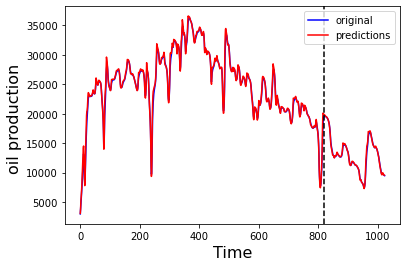

In [22]:
def experiment(series,look_back,neurons,n_epoch):

    raw_values = series.values
    # transform data to be stationary
    diff = difference(raw_values, 1)
    

    # create dataset x,y
    dataset = diff.values
    dataset = create_dataset(dataset,look_back)


    # split into train and test sets
    train_size = int(dataset.shape[0] * 0.8)
    test_size = dataset.shape[0] - train_size
    train, test = dataset[0:train_size], dataset[train_size:]


    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)



    # fit the model
    DNN_model = fit_DNN(train_scaled, 1, n_epoch, neurons)
    # forecast the entire training dataset to build up state for forecasting
    print('Forecasting Training Data')   
    predictions_train = list()
    for i in range(len(train_scaled)):
        # make one-step forecast
        X, y = train_scaled[i, 0:-1], train_scaled[i, -1]
        yhat = forecast_DNN(DNN_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(raw_values)-i)
        # store forecast
        predictions_train.append(yhat)
        #expected = raw_values[ i+1 ] 
        #print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

    # forecast the test data
    print('Forecasting Testing Data')
    predictions_test = list()
    for i in range(len(test_scaled)):
        # make one-step forecast
        X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
        yhat = forecast_DNN(DNN_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # store forecast
        predictions_test.append(yhat)
        expected = raw_values[len(train) + i + 1]
        print('Number%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

    # report performance using RMSE
    
    #report performance using RMSPE
    rmspe_test = RMSPE(raw_values[-len(test_scaled):],predictions_test)
    print('Test RMSPE: %.4f' % rmspe_test)
   
    MAPE_test = MAPE(raw_values[-len(test_scaled):], predictions_test)
    print('Test MAPE: %.5f' % MAPE_test)

    predictions = np.concatenate((predictions_train,predictions_test),axis=0)

    # line plot of observed vs predicted
    fig, ax = plt.subplots(1)
    ax.plot(raw_values, label='original', color='blue')
    ax.plot(predictions, label='predictions', color='red')
    ax.axvline(x=len(train_scaled)+1,color='k', linestyle='--')
    ax.legend(loc='upper right')
    ax.set_xlabel('Time',fontsize = 16)
    ax.set_ylabel('oil production ',fontsize = 16)
    plt.show()

    

def run():

    #load dataset
    new_series = df[df.columns[-2:]]
    #new_series = pd.DataFrame(df.values[:,-2:] ,columns=['Time','WOPR'])
    new_series.set_index("Time", inplace=True)
    series= new_series
    look_back= 2
    neurons=[ 64 ,64, 64,64,64 ]
    n_epoch=20
    experiment(series,look_back,neurons,n_epoch)

run()


